In [2]:
## Importing important stuff
import random
import numpy as np
import pandas as pd
from PIL import Image 
import tifffile as tiff
from tifffile import imsave
             ###############
#plotting
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go

# Run this code to make plots display properly in notebooks
%matplotlib inline
            ####################

import pickle as pkl
import time

In [3]:
#machine learning stuff
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical   
###
from keras import models
from keras import layers
###
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras import backend as K
####
import os

Using TensorFlow backend.


#### Loading and predicting data to be analyzed 

In [8]:
##### Unshuffled data frames 
df_good = pd.read_pickle("/users/PAS1495/akl2/work/bigdata_6820-Akl2/finalProject/df_good.pkl")
df_bad=  pd.read_pickle('/users/PAS1495/akl2/work/bigdata_6820-Akl2/finalProject/df_bad.pkl')

In [9]:
df_good.head()

,0,1,2,3,4,5,6,7,8,9,...,1439990,1439991,1439992,1439993,1439994,1439995,1439996,1439997,1439998,1439999
0,107,102,115,104,105,109,105,105,108,106,...,115,109,121,113,108,112,109,107,107,111
2,100,115,108,117,103,107,103,93,108,105,...,115,107,109,109,116,107,120,116,114,112
4,112,101,102,108,108,105,108,110,104,112,...,115,117,121,118,114,112,114,107,107,111
6,105,122,109,107,102,104,112,93,103,116,...,108,115,114,113,108,113,120,111,119,114
8,109,98,107,108,111,110,108,115,106,107,...,113,109,114,119,114,109,102,112,109,118


In [10]:
gd_imgs= df_good.values
bd_imgs= df_bad.values

In [11]:
type(gd_imgs)

numpy.ndarray

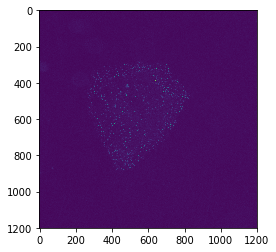

In [13]:
plt.imshow(gd_imgs[1].reshape(1200,1200))

In [14]:
C12 = tiff.imread('/users/PAS1495/akl2/work/Project/new_data/c12_300_.tif')
C13 = tiff.imread('/users/PAS1495/akl2/work/Project/new_data/c13_300_.tif')
C14 = tiff.imread('/users/PAS1495/akl2/work/Project/new_data/c14_300_.tif')

In [ ]:
#three cells each cell has 300 frames of good and 300 of bad

In [20]:
arr = np.asarray(C12[[2,4,5]])

In [22]:
good_index = list(range(0,600,2))
bad_index = list(range(1,600,2))
c12_gd = np.asarray(C12[good_index])
c12_bd = np.asarray(C12[bad_index])
c13_gd = np.asarray(C13[good_index])
c13_bd = np.asarray(C13[bad_index])
c14_gd = np.asarray(C14[good_index])
c14_bd = np.asarray(C14[bad_index])

In [24]:
x = np.concatenate((c12_bd, c13_bd, c14_bd), axis=0, out=None)
y = np.concatenate((c12_gd, c13_gd, c14_gd), axis=0, out=None) 

In [33]:
x[1][:,:].shape

(1200, 1200)

In [26]:
x_= x.reshape(x_test.shape[0], 1200, 1200)
y_= y.reshape(y_test.shape[0], 1200, 1200)

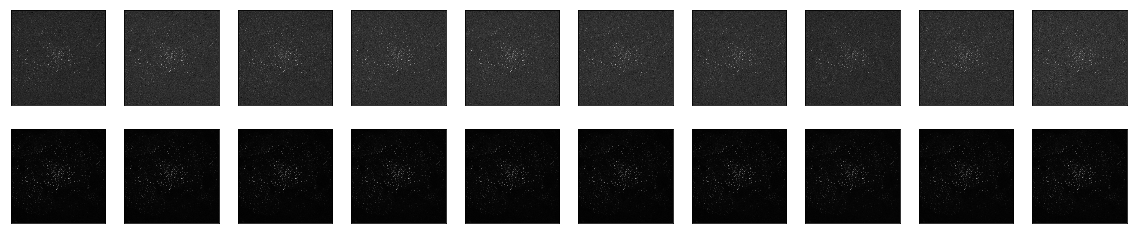

In [27]:
#checking correspondance 
#####check for correspondance
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
        # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [37]:
X_c12=[]
#x_reshaped=sample.reshape(1200,1200)
for i in range(2,7):
    for j in range(2,7):
        for n in range(300):
            X_c12.append(x[n][i*128:(i+1)*128, j*128:(j+1)*128])

In [43]:
x_crop = []
for i in range(2,7):
    for j in range(2,7):
        for n in range(300):
            x_crop.append(x[n][i*128:(i+1)*128, j*128:(j+1)*128])
        for m in range(300):
            x_crop.append(x[m+300][i*128:(i+1)*128, j*128:(j+1)*128])
        for k in range(300):
            x_crop.append(x[k+600][i*128:(i+1)*128, j*128:(j+1)*128])

In [46]:
y_crop = []
for i in range(2,7):
    for j in range(2,7):
        for n in range(300):
            y_crop.append(y[n][i*128:(i+1)*128, j*128:(j+1)*128])
        for m in range(300):
            y_crop.append(y[m+300][i*128:(i+1)*128, j*128:(j+1)*128])
        for k in range(300):
            y_crop.append(y[k+600][i*128:(i+1)*128, j*128:(j+1)*128])

In [48]:
len(y_crop)/300

75.0

# Saving the data

In [67]:
np.save('sequence_128_x.npy', np.asarray(x_crop).reshape(7500*3,128,128,1), allow_pickle = True)
np.save('sequence_128_y.npy', np.asarray(y_crop).reshape(7500*3,128,128,1), allow_pickle = True)

In [49]:
# we end up with 75 different sections or fields of view, each one is repeated 300 times. The size is 
# 128*128

# Predicting the data

In [61]:
#reshape and normalize 
x_in = np.asarray(x_crop)
x_in = x_in.reshape(x_in.shape[0], 128,128,1)
## normalize
x_in = x_in/3020.0
## predict
pred = model.predict(x_in[:3*300])

In [69]:
#function that saves tiff files to be analyzed by image J , takes FOV number, you can enter between 0 and 75(exclusive)
#outputs 4 files in the directory of the foler analysis_files 
def save_fov(fov_num):
    x_arr = np.asarray(x_crop[fov_num*300:(fov_num+1)*300]).reshape(300,128,128,1)
    y_arr = np.asarray(y_crop[fov_num*300:(fov_num+1)*300]).reshape(300,128,128,1)
    pred_arr = pred[fov_num*300:(fov_num+1)*300,:,:,:]
    comb_array = np.concatenate(( y_arr, pred_arr, x_arr), axis = 0)
    imsave('/users/PAS1495/akl2/work/increase_SNR/analysis_files/FOV_x_'+ str(fov_num)+'.tif', x_arr)
    imsave('/users/PAS1495/akl2/work/increase_SNR/analysis_files/FOV_y_'+ str(fov_num)+'.tif', y_arr)
    imsave('/users/PAS1495/akl2/work/increase_SNR/analysis_files/FOV_pred_'+ str(fov_num)+'.tif', pred_arr)
    imsave('/users/PAS1495/akl2/work/increase_SNR/analysis_files/FOV_comb_'+ str(fov_num)+'.tif', comb_array)

In [50]:
y_bit_16_arr = np.asarray(y_crop[:300]).reshape(300,128,128,1)
imsave('/users/PAS1495/akl2/work/increase_SNR/analysis_files/FOV_0.tif', y_bit_16_arr)

In [59]:
# Load model 
model = load_model('UNET_128_short.h5')
#make prediction 

#reshape

#predict 

#save prediction 

In [ ]:
np.save('sequence_128_pred.npy', pred, allow_pickle = True)

In [70]:
save_fov(0)